![SWBtr.gif](https://s12.gifyu.com/images/SWBtr.gif)

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

   
  
<h3 align="left"><font color=purple>🚫📧 Introduction of Spam:</font></h3><br> 

Spam refers to unsolicited and often irrelevant or inappropriate messages sent in bulk, typically via email or other digital communication channels. These messages are often commercial in nature, promoting products, services, or fraudulent schemes. Spam messages are sent without the recipient's consent, causing annoyance and cluttering inboxes.

<h3 align="left"><font color=purple>🚫🧠📧 Spam Classifier:</font></h3><br> 

A spam classifier is a machine learning model or algorithm designed to automatically detect and filter spam messages from legitimate ones. It analyzes the content and characteristics of incoming messages, such as emails or text messages, and assigns them a probability score of being spam or not. The classifier uses features like keywords, patterns, and sender information to distinguish between spam and non-spam messages, helping users manage their communications effectively and reduce the impact of spam in their daily interactions.
     </div>
</div>

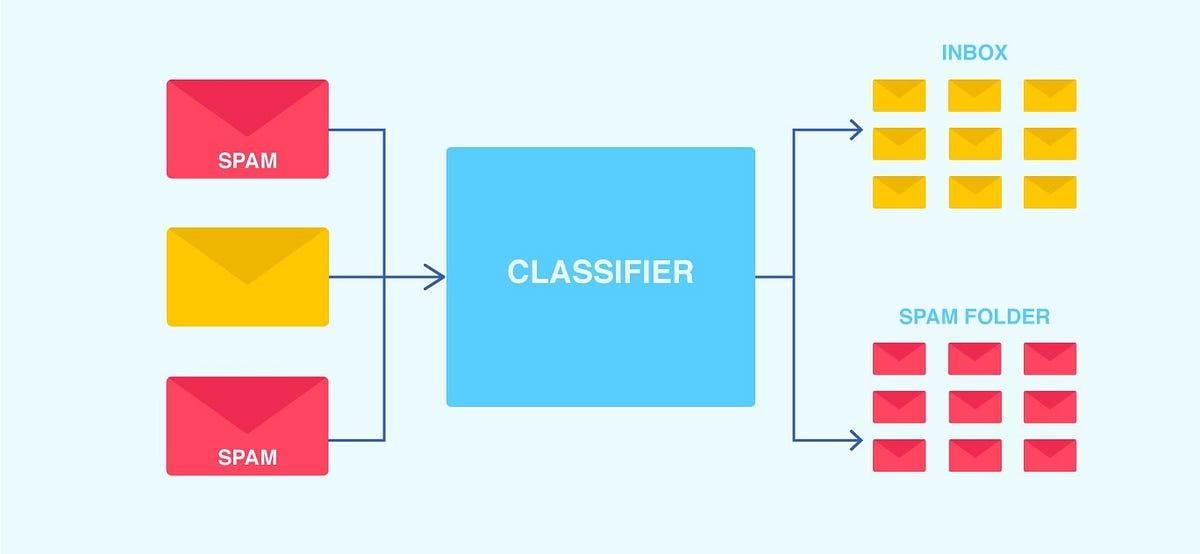

# 📚 Import Dependencies 📦


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Importing Dataset
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin-1")

In [3]:
df.sample(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4366,ham,I like dis sweater fr mango but no more my siz...,NaN,NaN,NaN


In [4]:
# Dataset with required features only
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin-1", usecols=["v1","v2"])

In [5]:
df.sample(5)

,v1,v2
5559,ham,if you aren't here in the next &lt;#&gt; hou...
1356,ham,U ned to convince him tht its not possible wit...
1818,ham,Am i that much dirty fellow?
4643,ham,Did u got that persons story
354,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.


# 🔢 Data Preprocessing 🔄


In [6]:
# Rename the Features
df.rename(columns={"v1": "output","v2": "input"}, inplace = True)

In [7]:
df.sample(1)

,output,input
3382,ham,K... Must book a not huh? so going for yoga ba...


# 🏷️ Label Encoder 🏷️


In [8]:
# Encoding Target Feature 
le = LabelEncoder()
df["output"] = le.fit_transform(df["output"])

In [9]:
df.sample(1)

,output,input
1093,0,Well the weather in cali's great. But its comp...


# 📊 Exploratory Data Analysis 📊


In [10]:
# Shape of the Dataset
df.shape

(5572, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   int64 
 1   input   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [12]:
# Check Null Values
df.isnull().sum()

output    0
input     0
dtype: int64

In [13]:
# Check Duplicate Values
df.duplicated().sum()

403

In [14]:
# Drop Duplicates
df = df.drop_duplicates(keep="first")

In [15]:
df.shape

(5169, 2)

In [16]:
df.head()

,output,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Ham & Spam Counts
df["output"].value_counts()

0    4516
1     653
Name: output, dtype: int64

# 🥧 Pie Chart 📈


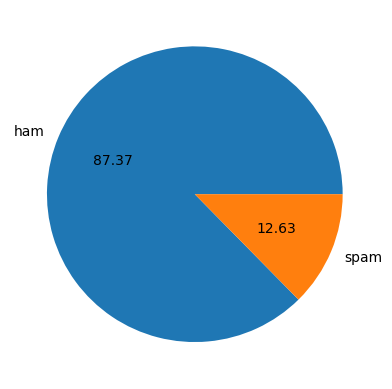

In [18]:
plt.pie(df["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

# Obsrevations:
- Data is Imblanced
- Having Less Spam Messages in Dataset

# 🔧 Feature Engineering 🔧


# ➕ Feature Construction: New Features ➕


In [19]:
# Total No. of Characters in Data
df["characters"] = df["input"].apply(len)

In [20]:
# Total No. of Words in Data
df["word"] = df["input"].apply(lambda x:len( nltk.word_tokenize(x)))

In [21]:
# Total No. of Sentence
df["sentence"] = df["input"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head(1)

,output,input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2


In [23]:
# Statistical Analysis of new features
df[["characters","word", "sentence"]].describe()

,characters,word,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [24]:
# Statistical Analysis for HAM Data
df[df["output"]==0][["characters","word", "sentence"]].describe()


,characters,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [25]:
# Statistical Analysis for SPAM Data
df[df["output"] ==1][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


# 📊 Histogram Plot 📊


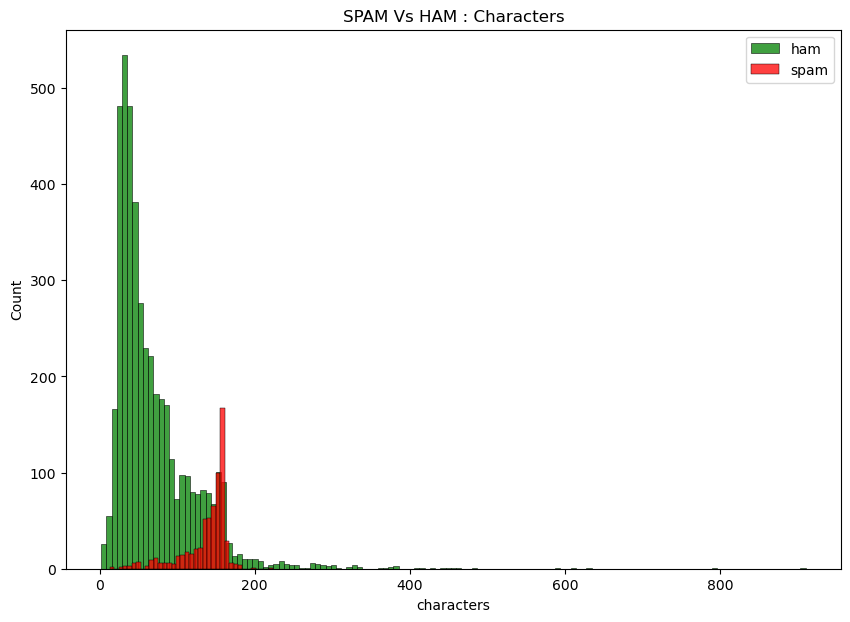

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

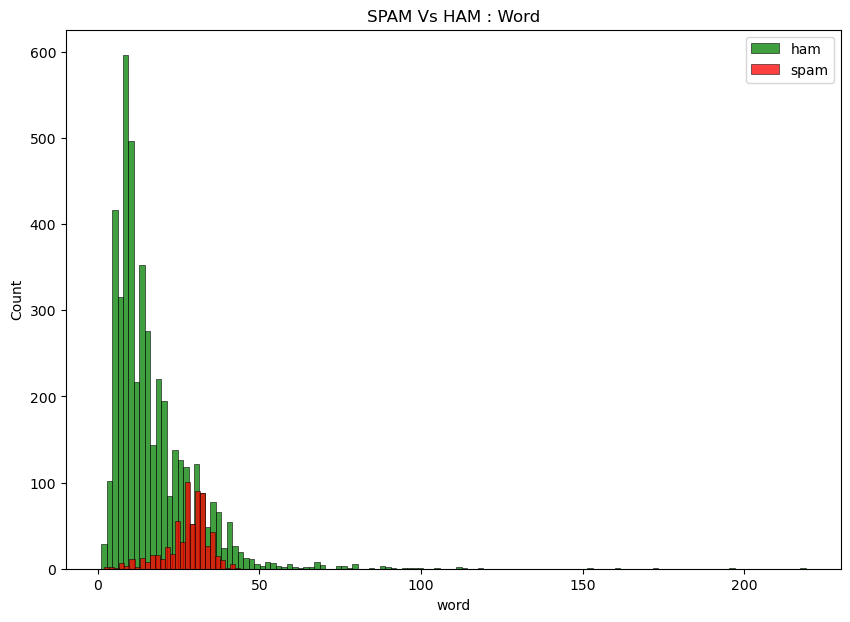

In [27]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

# Observations:
- Ham Characters and Words are more than Spam

# 🌌 Pair Plot 🌌


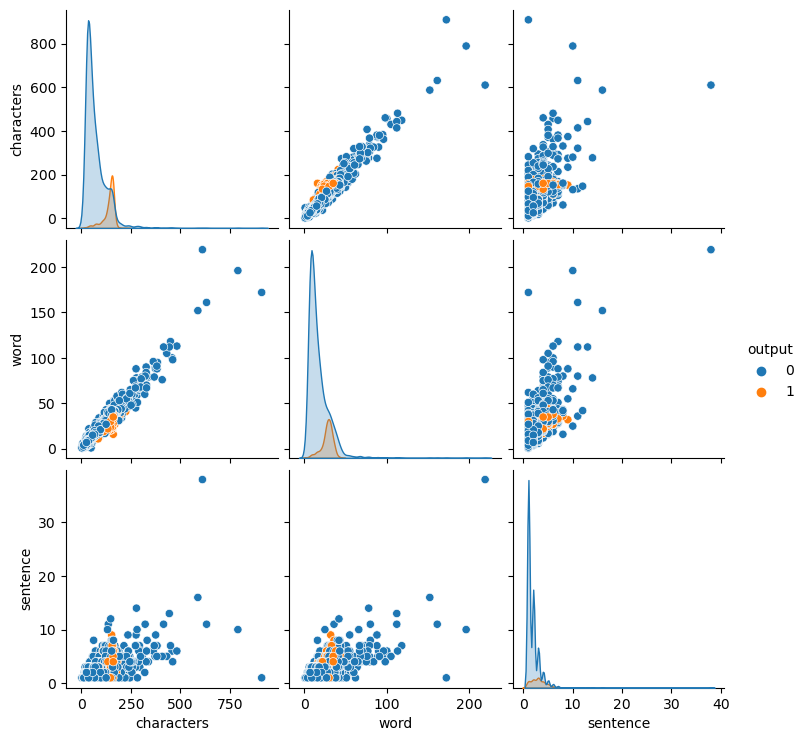

In [28]:
sns.pairplot(df,hue="output")

# Observations:
- Outliers are present 

In [ ]:
x = ['ham', 'spam']
y = df.groupby("output")["output"].agg("count").values

layout = go.Layout(title={'text':'Proportional Distribution of the Target Variable',
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                  template = 'plotly_dark')

fig = go.Figure(data=[go.Bar(
    x = x, y = y,
    text = y, textposition = 'auto',
    marker_color = "slateblue"
)], layout = layout)
fig.show()

In [ ]:
colors = ["slateblue", "darkred"]

fig = go.Figure(data=[go.Pie(labels = df['output'].value_counts().keys(),
                             values = df['output'].value_counts().values,
                             pull = [0, 0.25])])

fig.update_traces(hoverinfo ='label',
                  textinfo ='percent',
                  textfont_size = 20,
                  textposition ='auto',
                  marker=dict(colors=colors,
                              line = dict(color = 'lightgray',
                                          width = 1.5)))

fig.update_layout(title={'text': "Percentages of the Target Values",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')

iplot(fig)

In [ ]:
df['text_len'] = df['input'].apply(lambda x: len(x.split(' ')))

ham = df[df["output"] == "ham"]["text_len"].value_counts().sort_index()
spam = df[df["output"] == "spam"]["text_len"].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x = ham.index, y = ham.values, name = "ham", 
                         fill = "tozeroy"))
fig.add_trace(go.Scatter(x = spam.index, y = spam.values, name="spam",
                        fill = "tozeroy"))
fig.update_layout(title={'text': "Distributions of Target Values",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
fig.update_xaxes(range=[0, 50])
fig.update_yaxes(range=[0, 450])
fig.show()

# 🌡️ Heatmap 🌡️


In [29]:
# Correlations between features
df.corr()

,output,characters,word,sentence
output,1.000000,0.384717,0.264198,0.267602
characters,0.384717,1.000000,0.965307,0.626118
word,0.264198,0.965307,1.000000,0.683561
sentence,0.267602,0.626118,0.683561,1.000000


<Axes: >

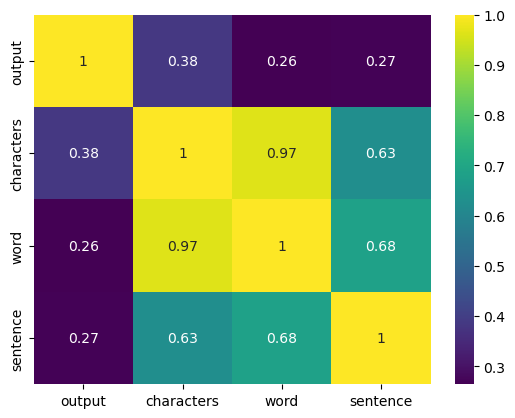

In [30]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

# Observations:
- "Characters" and "Word" have a moderately strong positive correlation of 0.965307

In [31]:
# Intilizing Porter Stemmer Class
ps = PorterStemmer()

In [32]:
# This Function helps to get Ready!!!

def data(text):
    text = text.lower()               #  Converts Text in Lower Case
    text = nltk.word_tokenize(text)   #  Breaks Text in Words 
    
    y = []
    for i in text:
        if i.isalnum():               #  Removing Special Characters
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                    #  Removing Stopwords and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                    #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))
        
    return " ".join(y)

In [33]:
# Checking data function 
data("shree ram 🚩 and shree mahakaleshawar 🔱 are everything for me")

'shree ram shree mahakaleshawar everyth'

In [34]:
df.sample(2)

,output,input,characters,word,sentence
304,1,SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...,146,34,6
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [35]:
# Transforming dataset using the "data" function in new column "new_data"
df["new_data"] = df["input"].apply(data)

In [36]:
df.sample(5)

,output,input,characters,word,sentence,new_data
1102,0,Black shirt n blue jeans... I thk i c Ì_...,43,12,2,black shirt n blue jean thk c
2701,0,"Hiya, sorry didn't hav signal. I haven't seen ...",169,43,4,hiya sorri hav signal seen heard neither unusu...
1766,1,SMS AUCTION You have won a Nokia 7250i. This i...,162,33,4,sm auction nokia 7250i get win free auction ta...
111,0,Going for dinner.msg you after.,31,6,1,go
5380,0,Its sunny in california. The weather's just cool,48,10,2,sunni california weather cool


# 🌫️ Word Cloud ☁️


In [37]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

In [38]:
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["output"] ==1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["output"] ==0]["new_data"].str.cat(sep=" "))

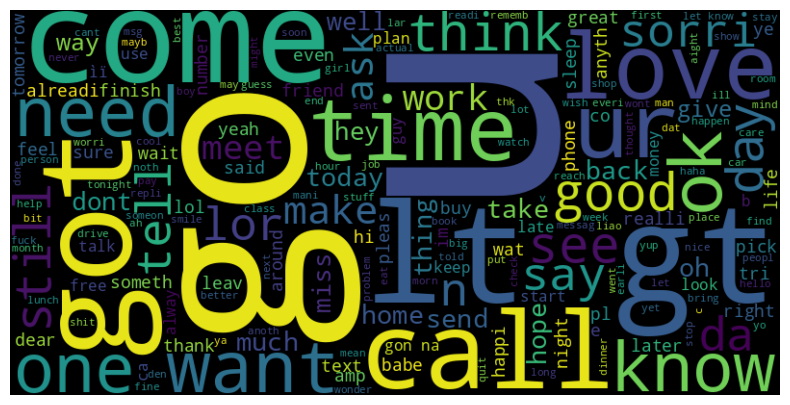

In [39]:
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

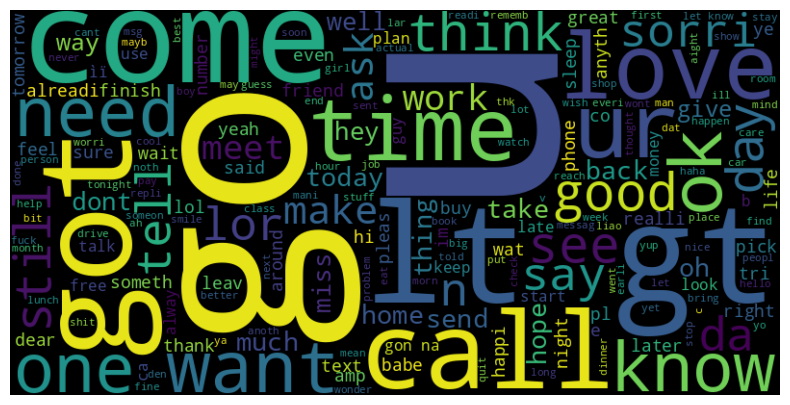

In [40]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in df[df["output"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# 📊 Bar Plot 📊


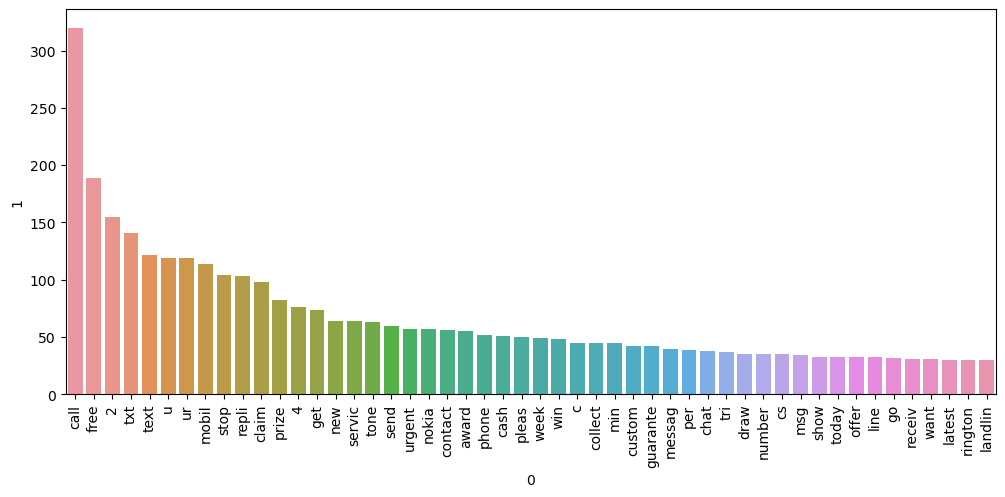

In [42]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

In [43]:
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in df[df['output'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

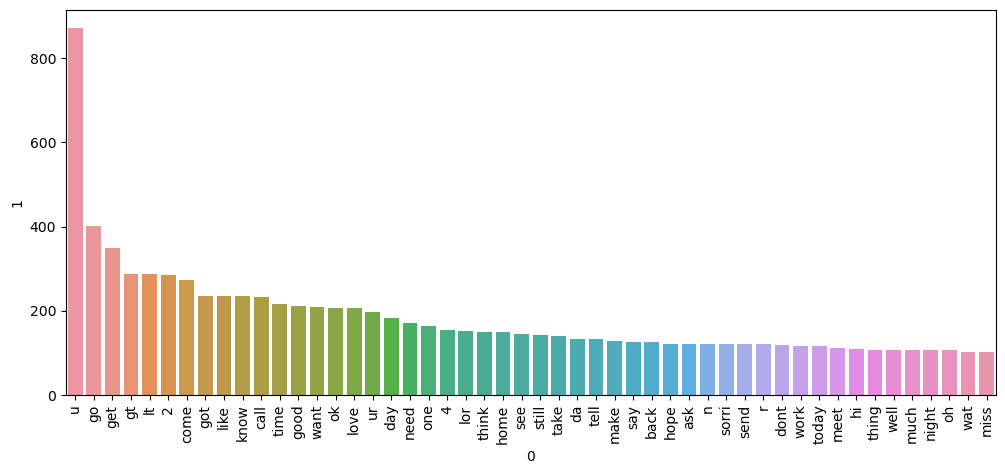

In [44]:
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

# 🔤 Vectorization 🔤


In [45]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)

In [46]:
# Independent Feature
X = tfidv.fit_transform(df["new_data"]).toarray()

In [47]:
# Dependent Feature
y = df["output"].values

In [48]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# 🎓 Models Training 🤖


In [49]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
}

In [50]:
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    
    return acc, pre

In [51]:
# A FOR loop Calls "traim_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    
    acc_s.append(accuracy)
    pre_s.append(precision)

In [52]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(), 
                          "Accuracy": acc_s, 
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)

# 📈 Algorithms: Accuracy and Precision 🎯


In [53]:
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.972921,1.000000
6,KNN,0.905222,1.000000
2,Bernoulli NB,0.981625,0.991736
9,ETC,0.979691,0.983471
8,Random Forest,0.974855,0.982759
4,SVC,0.970986,0.973684
3,Logistic Regression,0.951644,0.968085
12,XGB,0.970986,0.942623
11,Gradient Boost,0.956480,0.934579
10,Ada Boost,0.964217,0.931624


# Observations:
- Multinomial NB has an accuracy of 97.29% and a precision of 100.00%.
- KNN (K-Nearest Neighbors) has an accuracy of 90.52% and a precision of 100.00%.
- Bernoulli NB has an accuracy of 98.16% and a precision of 99.17%.
- ETC (Extra Trees Classifier) has an accuracy of 97.97% and a precision of 98.35%.
- Random Forest has an accuracy of 97.49% and a precision of 98.28%.
- SVC (Support Vector Classifier) has an accuracy of 97.10% and a precision of 97.37%.
- Logistic Regression has an accuracy of 95.16% and a precision of 96.81%.
- Gradient Boost has an accuracy of 95.74% and a precision of 94.34%.
- XGB (Extreme Gradient Boosting) has an accuracy of 97.10% and a precision of 94.26%.
- Ada Boost has an accuracy of 96.42% and a precision of 93.16%.
- Bagging CLF (Classifier) has an accuracy of 95.36% and a precision of 87.50%.
- XGBRF (XGBoost Random Forest) has an accuracy of 94.00% and a precision of 87.25%.
- Decision Tree has an accuracy of 94.39% and a precision of 80.77%.
- Gaussian NB (Naive Bayes) has an accuracy of 86.75% and a precision of 50.22%.

# 📊 Scores Bar Plot 📊


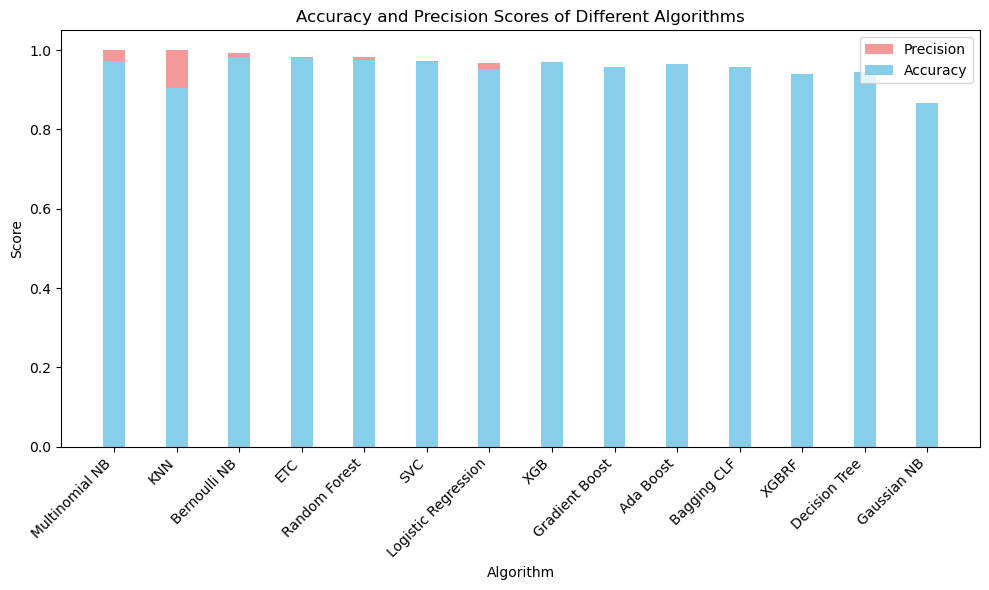

In [54]:
# Graph Accuracy and Precision

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Observations:
- Models with high precision scores, such as Multinomial NB (100.00%), KNN (100.00%), and Bernoulli NB (99.17%), have a high ability to correctly identify positive instances.
- Models with high accuracy scores, such as Bernoulli NB (98.16%) and Random Forest (97.49%), make accurate overall predictions on the dataset.

In [55]:
# Hence Multinomial Naïve Bayes give excellent precision and accuracy scores.
# According to me MNB is sutaible for Model

mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

# 📌 Pickle Files 📌

In [56]:
# Pickle files help in Model Deployment

pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(tfidv, open("tfidf.pkl","wb"))
pickle.dump(data,open("fun.pkl","wb"))